In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import dvu
import seaborn as sns
from sklearn import datasets
from sklearn import decomposition
from sklearn.datasets import load_diabetes
import pandas as pd
from os.path import join as oj
colors = ['#6E8E96', '#D3787D', '#AC3931']
out_dir = '../docs/img'

# generate some data

In [2]:
data_all = load_diabetes()
df = pd.DataFrame(data_all.data, columns=data_all.feature_names)
df.head()

d = df.copy() # d is same data, but with a categorical var
remap = {-0.044641636506989: 'male', 0.0506801187398187: 'female'}
d['sex'] = [remap[v] for v in df.sex]

**extended heatmap**

/Users/chandan/Desktop/data-viz-utils/data-viz-utils/dvu.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(gs[topheight:, -rightwidth:])


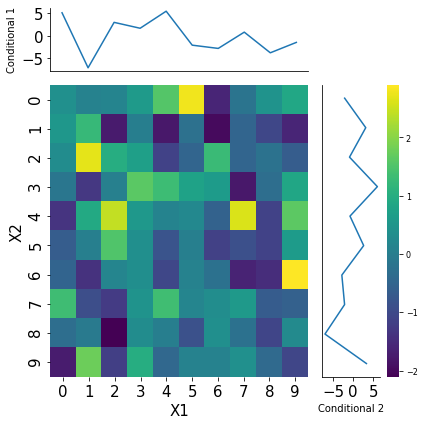

In [4]:
mat = np.random.randn(10, 10)
cond1 = mat.sum(axis=0)
cond2 = mat.sum(axis=1)
dvu.heatmap_extended(mat, cond1, cond2, show_cbar=True, annot=False)
plt.savefig(oj(out_dir, 'plot_heatmap_extended.png'), dpi=300)

**pc plot**

/Users/chandan/Desktop/data-viz-utils/data-viz-utils/dvu.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(feat_names))
/usr/local/Cellar/ipython/6.4.0_1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/usr/local/Cellar/ipython/6.4.0_1/libexec/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


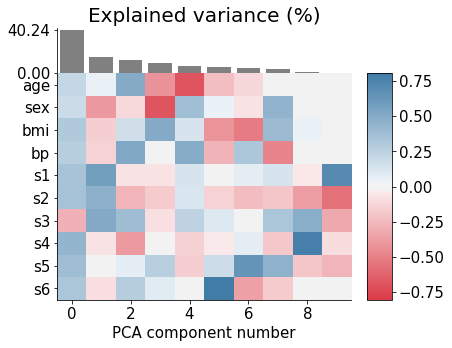

In [6]:
pca = decomposition.PCA()
pca.fit(df)
comps = pca.components_.transpose()
plt.figure(figsize=(6, 5))
dvu.plot_pcs(pca, list(df.columns))
plt.savefig(oj(out_dir, 'plot_pcs.png'), dpi=300)
plt.show()

**grouped jointplot**

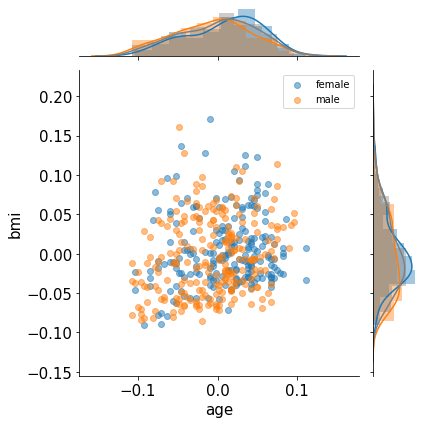

In [7]:
dvu.jointplot_grouped('age', 'bmi', 'sex', d)
plt.savefig(oj(out_dir, 'plot_joint_grouped.png'), dpi=300)

**auto-label lines**

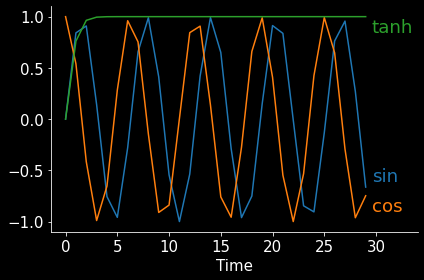

In [9]:
x = np.arange(30)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tanh(x)
plt.plot(x, y1, label='sin')
plt.plot(x, y2, label='cos')
plt.plot(x, y3, label='tanh')
plt.xlabel('Time')

# original legend
plt.legend()
plt.savefig(oj(out_dir, 'plot_labeled_lines_orig.png'), dpi=300)
plt.gca().get_legend().remove()

# dvu line legend
dvu.line_legend(fontsize=18.2, adjust_text_labels=True, extra_spacing=0.15)
plt.savefig(oj(out_dir, 'plot_labeled_lines.png'), dpi=300)
    
# dark mode legend
dvu.invert_plot()
plt.savefig(oj(out_dir, 'plot_labeled_lines_dark.png'), dpi=300)

**2-legend plot**

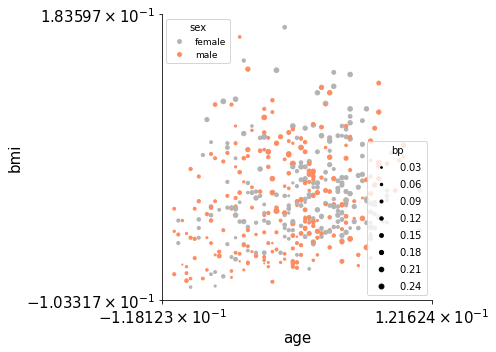

In [8]:
# cs_d = {'Male': 'red', 'Female': 'blue'}
# cs = ['#91bfdb','#dec34b','#fc8d59']
markersize_rescaling = 0.01
xlab = 'age'
ylab = 'bmi'
colorlab = 'sex'
sizelab = 'bp'
x = df[xlab]
y = d[ylab]
c = d[colorlab] #[cs_d[x] for x in d['sex']] # d['Severity 3-day'] #
s = (d[sizelab] - d[sizelab].min() + 0.01) / markersize_rescaling

dvu.scatter_2_legends(x, y, c, s,
                      xlab, ylab, colorlab, sizelab,
                      markersize_rescaling, figsize=(7, 5))
plt.savefig(oj(out_dir, 'plot_scatter_2_legends.png'), dpi=300)